# **INF161 Project** - Bike traffic predictions

#### *A model to predict how many people cycle over Nygårdsbroen at a given time.* 


## **Part 1** - Data preparations and exploratory data analysis

In this part of the project I will do data preparations and vizualisation of the data. 

First, I implement necessary packages that I may want to use. 

In [1212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### **Weather data preparations**

Then I read in the datasets of the weather from 2015 to 2022, and take a look at one of them. 

I chose these datasets, because the traffic data is from 2015 to 2022, and I want to combine them.

In [1213]:
weather_data_2015_2016 = pd.read_csv("rawdata\Florida_2015-01-01_2016-01-01_1654174882.csv", encoding = "UTF-8")
weather_data_2016_2017 = pd.read_csv("rawdata\Florida_2016-01-01_2017-01-01_1654174902.csv", encoding = "UTF-8")
weather_data_2017_2018 = pd.read_csv("rawdata\Florida_2017-01-01_2018-01-01_1654174925.csv", encoding = "UTF-8")
weather_data_2018_2019 = pd.read_csv("rawdata\Florida_2018-01-01_2019-01-01_1654175073.csv", encoding = "UTF-8")
weather_data_2019_2020 = pd.read_csv("rawdata\Florida_2019-01-01_2020-01-01_1654174955.csv", encoding = "UTF-8")
weather_data_2020_2021 = pd.read_csv("rawdata\Florida_2020-01-01_2021-01-01_1654174973.csv", encoding = "UTF-8")
weather_data_2021_2022 = pd.read_csv("rawdata\Florida_2021-01-01_2022-01-01_1654174989.csv", encoding = "UTF-8")
weather_data_2022_2022 = pd.read_csv("rawdata\Florida_2022-01-01_2022-06-01_1654175011.csv", encoding = "UTF-8")

weather_data_2018_2019.head()

,Dato,Tid,Globalstraling,Solskinstid,Lufttemperatur,Vindretning,Vindstyrke,Lufttrykk,Vindkast
0,2018-01-01,00:00,-0.1,0.0,4.1,185.0,3.1,968.2,7.5
1,2018-01-01,00:10,-0.2,0.0,4.8,181.0,3.8,968.2,9.6
2,2018-01-01,00:20,-0.1,0.0,4.8,177.0,3.7,968.4,8.1
3,2018-01-01,00:30,-0.0,0.0,4.9,201.0,3.3,968.4,5.4
4,2018-01-01,00:40,-0.1,0.0,5.5,167.0,3.9,968.2,7.2


Then I collects the weather data in to one data frame, and takes a quick look on the connected data. 

In [1214]:
weather_data = pd.concat([weather_data_2015_2016, weather_data_2016_2017, weather_data_2017_2018, weather_data_2018_2019, 
weather_data_2019_2020, weather_data_2020_2021, weather_data_2021_2022, weather_data_2022_2022])

weather_data.head()

,Dato,Tid,Globalstraling,Solskinstid,Lufttemperatur,Vindretning,Vindstyrke,Lufttrykk,Vindkast
0,2015-01-01,00:00,18.1,0.0,6.6,166.0,4.2,1008.6,NaN
1,2015-01-01,00:10,19.5,0.0,6.6,159.0,4.0,1008.6,NaN
2,2015-01-01,00:20,20.2,0.0,6.6,154.0,3.1,1008.3,NaN
3,2015-01-01,00:30,20.2,0.0,6.6,154.0,3.7,1008.3,NaN
4,2015-01-01,00:40,20.2,0.0,6.7,151.0,2.9,1007.9,NaN


Below I first check the different categories in the columns for missing values, and then missing data, since the weather data uses the code 9999.99 for missing data.

In [1215]:
weather_data.isna().sum()

Dato                 0
Tid                  0
Globalstraling     798
Solskinstid        799
Lufttemperatur     798
Vindretning        797
Vindstyrke         797
Lufttrykk          797
Vindkast          1101
dtype: int64

In [1216]:
weather_data[weather_data == 9999.99].count()

Dato                 0
Tid                  0
Globalstraling    3503
Solskinstid       3604
Lufttemperatur    2409
Vindretning       2565
Vindstyrke        2405
Lufttrykk         2402
Vindkast          2396
dtype: int64

Then I replaced 9999.99 with NaN, and took a new look on the missing values to see if the numbers matches with the numbers I found above.

In [1217]:
weather_data = weather_data.replace([9999.99], np.NaN)
weather_data.isna().sum()

Dato                 0
Tid                  0
Globalstraling    4301
Solskinstid       4403
Lufttemperatur    3207
Vindretning       3362
Vindstyrke        3202
Lufttrykk         3199
Vindkast          3497
dtype: int64

Next, I merged the "Dato" and "Tid" columns to one column named "Datetime". I changed the time for the weather data to one hour instead of every ten minute, because I am going to merge it with the traffic data later on.

I took a look on the data, to see that the changes actually were made.

In [1218]:
weather_data["Datetime"] = pd.to_datetime(weather_data["Dato"] + " " + weather_data["Tid"])
weather_data.drop(["Dato", "Tid"], axis=1, inplace=True)
weather_data = weather_data.set_index(["Datetime"])
weather_data = weather_data.resample("60T").agg({"Globalstraling" : "mean", "Solskinstid" : "sum",
                                                "Lufttemperatur" : "mean", "Vindretning" : "median", 
                                                "Vindstyrke" : "mean", "Lufttrykk" : "mean", "Vindkast" : "mean"})

weather_data.head()

,Globalstraling,Solskinstid,Lufttemperatur,Vindretning,Vindstyrke,Lufttrykk,Vindkast
Datetime,,,,,,,
2015-01-01 00:00:00,19.850000,0.0,6.633333,154.0,3.483333,1008.250000,NaN
2015-01-01 01:00:00,18.916667,0.0,6.816667,153.5,3.350000,1007.083333,NaN
2015-01-01 02:00:00,21.133333,0.0,6.983333,153.0,3.783333,1006.016667,NaN
2015-01-01 03:00:00,21.833333,0.0,7.200000,154.0,4.016667,1005.016667,NaN
2015-01-01 04:00:00,22.883333,0.0,7.533333,154.0,5.016667,1003.883333,NaN


There are a number of different variables, but you can imagine that some of these are more important than others when it comes to whether you choose to ride a bike or not. I therefore choose to cut away some of the columns that I believe are less important when you make that choice. 

The columns I choose to continue with are "Datetime", "Globalstraling", "Solskinstid", "Lufttemperatur" and "Vindstyrke".

In [1219]:
weather_data = weather_data.drop(["Vindretning", "Lufttrykk", "Vindkast"], axis=1)

weather_data.head()

,Globalstraling,Solskinstid,Lufttemperatur,Vindstyrke
Datetime,,,,
2015-01-01 00:00:00,19.850000,0.0,6.633333,3.483333
2015-01-01 01:00:00,18.916667,0.0,6.816667,3.350000
2015-01-01 02:00:00,21.133333,0.0,6.983333,3.783333
2015-01-01 03:00:00,21.833333,0.0,7.200000,4.016667
2015-01-01 04:00:00,22.883333,0.0,7.533333,5.016667


### **Traffic data preparations**

Then I read in the traffic data, and take a look on it. 

In [1220]:
traffic_data = pd.read_csv("rawdata/trafikkdata.csv")

columns = traffic_data.columns[0].split(";")[:-6]
first_column = traffic_data.columns[0]
traffic_data[columns] = traffic_data[first_column].str.split(";", expand=True)

In [1221]:
traffic_data.head()

,Trafikkregistreringspunkt;Navn;Vegreferanse;Fra;Til;Dato;Fra tidspunkt;Til tidspunkt;Felt;Volum;Dekningsgrad (%);Antall timer total;Antall timer inkludert;Antall timer ugyldig;Ikke gyldig lengde;Lengdekvalitetsgrad (%);< 5,6m;>= 5,6m;5,6m - 7,6m;7,6m - 12,5m;12,5m - 16,0m;>= 16,0m;16,...,Navn,Vegreferanse,Fra,Til,Dato,Fra tidspunkt,Til tidspunkt,Felt,Volum,Dekningsgrad (%)
0,17981B2483952;GM.NYG�RDSBRU SYKKEL;FV5332 S1D1...,0;1;1;1;-;-;-;-;-;-;-;-;-;-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,GM.NYG�RDSBRU SYKKEL,FV5332 S1D1 m50,2015-07-16T15:00+02:00,2015-07-16T16:00+02:00,2015-07-16,15:00,16:00,1,-,0
1,17981B2483952;GM.NYG�RDSBRU SYKKEL;FV5332 S1D1...,0;1;1;1;-;-;-;-;-;-;-;-;-;-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,GM.NYG�RDSBRU SYKKEL,FV5332 S1D1 m50,2015-07-16T15:00+02:00,2015-07-16T16:00+02:00,2015-07-16,15:00,16:00,2,-,0
2,17981B2483952;GM.NYG�RDSBRU SYKKEL;FV5332 S1D1...,0;1;1;1;-;-;-;-;-;-;-;-;-;-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,GM.NYG�RDSBRU SYKKEL,FV5332 S1D1 m50,2015-07-16T15:00+02:00,2015-07-16T16:00+02:00,2015-07-16,15:00,16:00,3,-,0
3,17981B2483952;GM.NYG�RDSBRU SYKKEL;FV5332 S1D1...,0;1;1;1;-;-;-;-;-;-;-;-;-;-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,GM.NYG�RDSBRU SYKKEL,FV5332 S1D1 m50,2015-07-16T15:00+02:00,2015-07-16T16:00+02:00,2015-07-16,15:00,16:00,4,-,0
4,17981B2483952;GM.NYG�RDSBRU SYKKEL;FV5332 S1D1...,0;1;1;1;-;-;-;-;-;-;-;-;-;-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,GM.NYG�RDSBRU SYKKEL,FV5332 S1D1 m50,2015-07-16T15:00+02:00,2015-07-16T16:00+02:00,2015-07-16,15:00,16:00,Totalt i retning DANMARKSPLASS,-,0


There are many different variables in the traffic data file, it is therefore important to remove the less important variables so that it will be easier to work with the data further.

First, I changed all the data in the column "Felt" to "Totalt", and then every row turned into be "Totalt", so I just removed it. 

I have chosen to proceed with "Dato", "Fra tidspunkt", "Dekningsgrad (%)" and "Volum". 

In [1222]:
traffic_data = traffic_data[traffic_data["Felt"] == "Totalt"]
traffic_data = traffic_data[["Dato", "Fra tidspunkt", "Dekningsgrad (%)", "Volum"]]

traffic_data.head()

,Dato,Fra tidspunkt,Dekningsgrad (%),Volum
6,2015-07-16,15:00,0,-
13,2015-07-16,16:00,100,107
20,2015-07-16,17:00,100,84
27,2015-07-16,18:00,100,57
34,2015-07-16,19:00,100,49


Before I moved on, I replaced all the "-" and "" with NaN.

In [1223]:
traffic_data = traffic_data.replace(["-"], np.NaN)
traffic_data = traffic_data.replace([""], np.NaN)

Then I merged the "Dato" and "Tid" columns to one column, the same way as for the weather data.

In [1224]:
traffic_data["Datetime"] = pd.to_datetime(traffic_data["Dato"] + " " + traffic_data["Fra tidspunkt"])
traffic_data.drop(["Dato", "Fra tidspunkt"], axis=1, inplace=True)

traffic_data.head()

,Dekningsgrad (%),Volum,Datetime
6,0,NaN,2015-07-16 15:00:00
13,100,107,2015-07-16 16:00:00
20,100,84,2015-07-16 17:00:00
27,100,57,2015-07-16 18:00:00
34,100,49,2015-07-16 19:00:00


### **Combining weather and traffic data**

I want the weather data to start from the same date and time as the traffic data. So I drop the times before the first time in the traffic data from the weather data from 2015.

In [1225]:
weather_data_2015_2016.drop(weather_data_2015_2016[weather_data_2015_2016["Dato"] < "2015-07-16"].index, inplace = True)
weather_data_2015_2016.drop(weather_data_2015_2016[(weather_data_2015_2016["Tid"] < "15:00") & (weather_data_2015_2016["Dato"] == "2015-07-16")].index, inplace = True)

Then I combined the weather data and the traffic data in to one data frame. 

In [1226]:
weather_traffic_data = weather_data.merge(traffic_data, on="Datetime")

weather_traffic_data.head()

,Datetime,Globalstraling,Solskinstid,Lufttemperatur,Vindstyrke,Dekningsgrad (%),Volum
0,2015-07-16 15:00:00,504.400000,43.4,13.900000,4.083333,0,NaN
1,2015-07-16 16:00:00,432.833333,48.7,13.733333,4.333333,100,107
2,2015-07-16 17:00:00,378.400000,60.0,13.866667,3.933333,100,84
3,2015-07-16 18:00:00,212.583333,60.0,13.216667,4.233333,100,57
4,2015-07-16 19:00:00,79.750000,60.0,12.683333,2.950000,100,49


### **Visualization and cleaning of the weather and traffic data**

First, I have a look on the missing values for each year. The reason I want to have a look on this is that for some of the plots and diagrams I will drop the missing values, and therefore I want to know if some years differs a lot from the others on missing values. 

I am especially interested in the volum parameter, because that is what we are going to predict. 

In [1227]:
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021]
for year in years:
    print(weather_traffic_data[weather_traffic_data["Datetime"].dt.year == year].isnull().sum())

Datetime             0
Globalstraling       1
Solskinstid          0
Lufttemperatur      11
Vindstyrke          11
Dekningsgrad (%)     0
Volum               32
dtype: int64
Datetime             0
Globalstraling      32
Solskinstid          0
Lufttemperatur      44
Vindstyrke          44
Dekningsgrad (%)     0
Volum               43
dtype: int64
Datetime             0
Globalstraling      20
Solskinstid          0
Lufttemperatur       5
Vindstyrke           5
Dekningsgrad (%)     0
Volum                4
dtype: int64
Datetime             0
Globalstraling       0
Solskinstid          0
Lufttemperatur       1
Vindstyrke           1
Dekningsgrad (%)     0
Volum               32
dtype: int64
Datetime              0
Globalstraling        0
Solskinstid           0
Lufttemperatur        1
Vindstyrke            0
Dekningsgrad (%)      0
Volum               102
dtype: int64
Datetime            0
Globalstraling      0
Solskinstid         0
Lufttemperatur      0
Vindstyrke          0
Dekningsgrad 

We can see that 2019 has the most missing values for volum, and 2020 and 2021 has the least. It is good to have in mind while evaluating the plots and making decisions based on them. 

#### **The corona pandemic**

The period fra March 2020 to September 2021 was affected by the corona pandemic. I will therefore see if this time period differs from the rest of the data. 

By partitioning the data per year, and number of people crossing Nygårdsbroen per year, I can see if the numbers for 2020 and 2021 stands out very much.

Text(0, 0.5, 'Number of people')

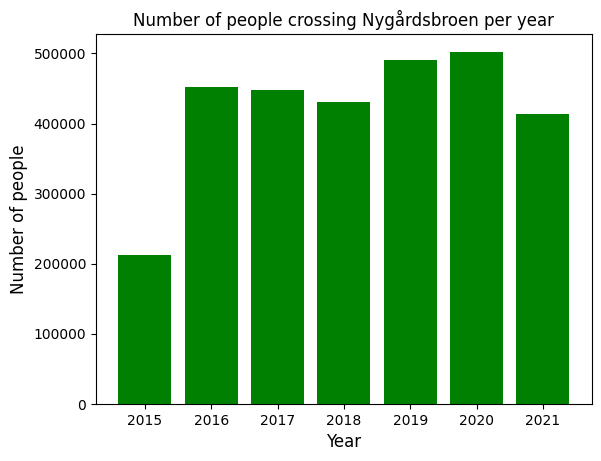

In [1228]:
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021]
volum = []

visualization_data = weather_traffic_data.dropna()

for year in years:
    data = visualization_data[visualization_data["Datetime"].dt.year == year]
    volum.append(data["Volum"].astype(int).sum())


plt.bar(years, volum, color="g")
plt.title("Number of people crossing Nygårdsbroen per year")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of people", fontsize=12)

By looking on the figur above, we see that 2020 was the year where most people were crossing Nygårdsbroen. Thus, the corona pandemic did not affect the bicycle traffic over Nygårdsbroen. A reason for that may be that people was more outdoor because of the rules from the government, and many people may have chosen to walk or ride a bike instead of using bus and bybane.

My figure shows that in 2015 it was quite a few people crossing Nygårdsbroen compared to the other years, the reason for this is that the traffic data starts i July.

Since the number of people crossing Nygårdsbroen in 2020 and 2021 doesn't differ from the other years, I will continue with all the years. 

#### **UCI Road World Championships 2017 in Bergen**

In end of september 2017 UCI Road World Championships was held in Bergen. This may have affected the number of bikes crossing Nygårdsbroen on the certain dates. I will make a plot to see if it increased around that dates, compared to the other years.

In [1229]:
weather_traffic_data["Volum"] = weather_traffic_data["Volum"].astype(np.float64)

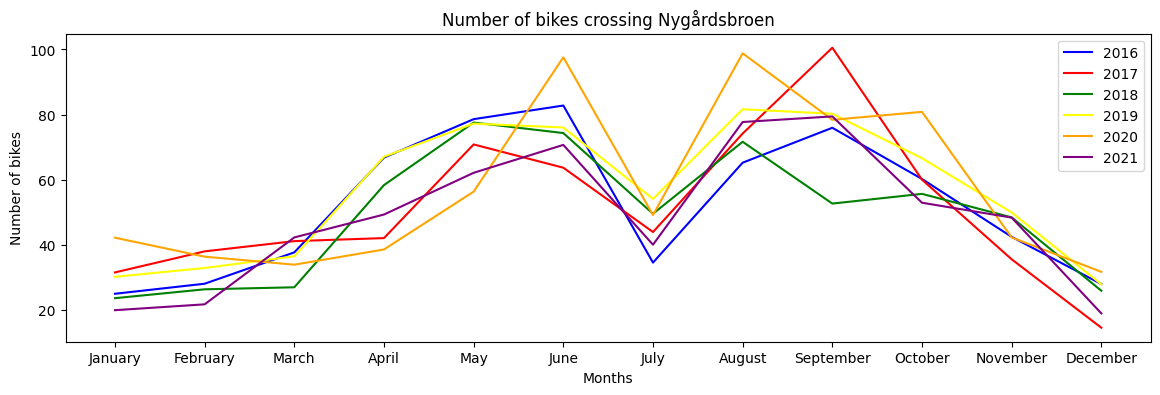

In [1230]:
weather_traffic_2016 = weather_traffic_data[weather_traffic_data["Datetime"].dt.year == 2016]
weather_traffic_2017 = weather_traffic_data[weather_traffic_data["Datetime"].dt.year == 2017]
weather_traffic_2018 = weather_traffic_data[weather_traffic_data["Datetime"].dt.year == 2018]
weather_traffic_2019 = weather_traffic_data[weather_traffic_data["Datetime"].dt.year == 2019]
weather_traffic_2020 = weather_traffic_data[weather_traffic_data["Datetime"].dt.year == 2020]
weather_traffic_2021 = weather_traffic_data[weather_traffic_data["Datetime"].dt.year == 2021]

fig, axs = plt.subplots(figsize=(14, 4))
fig.patch.set_facecolor("white")

weather_traffic_data.groupby(weather_traffic_2016["Datetime"].dt.month)["Volum"].mean().plot(color="blue", label="2016")
weather_traffic_data.groupby(weather_traffic_2017["Datetime"].dt.month)["Volum"].mean().plot(color="red", label="2017")
weather_traffic_data.groupby(weather_traffic_2018["Datetime"].dt.month)["Volum"].mean().plot(color="green", label="2018")
weather_traffic_data.groupby(weather_traffic_2019["Datetime"].dt.month)["Volum"].mean().plot(color="yellow", label="2019")
weather_traffic_data.groupby(weather_traffic_2020["Datetime"].dt.month)["Volum"].mean().plot(color="orange", label="2020")
weather_traffic_data.groupby(weather_traffic_2021["Datetime"].dt.month)["Volum"].mean().plot(color="purple", label="2021")
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September","October","November","December"]
plt.xlabel("Months")
plt.ylabel("Number of bikes")
plt.xticks(range(1, 13), months)
plt.legend()
plt.title("Number of bikes crossing Nygårdsbroen")
plt.show()

#### **Season**

Next, I divided the data into the four different seasons. 0 represents winter, 1 represents spring, 2 represents summer and 3 represents fall. 

In [1231]:
seasons = {1: 0, 2: 0, 3: 1, 4: 1, 5: 1, 6: 2, 7: 2, 8: 2, 9: 3, 10: 3, 11: 3, 12: 0}
weather_traffic_data["Season"] = weather_traffic_data["Datetime"].dt.month.apply(lambda x: seasons[x])
weather_traffic_data

,Datetime,Globalstraling,Solskinstid,Lufttemperatur,Vindstyrke,Dekningsgrad (%),Volum,Season
0,2015-07-16 15:00:00,504.400000,43.4,13.900000,4.083333,0,NaN,2
1,2015-07-16 16:00:00,432.833333,48.7,13.733333,4.333333,100,107.0,2
2,2015-07-16 17:00:00,378.400000,60.0,13.866667,3.933333,100,84.0,2
3,2015-07-16 18:00:00,212.583333,60.0,13.216667,4.233333,100,57.0,2
4,2015-07-16 19:00:00,79.750000,60.0,12.683333,2.950000,100,49.0,2
...,...,...,...,...,...,...,...,...
60150,2022-05-28 22:00:00,-0.483333,0.0,7.450000,4.983333,NaN,NaN,1
60151,2022-05-28 23:00:00,-0.766667,0.0,7.133333,5.050000,NaN,NaN,1
60152,2022-05-29 00:00:00,-0.816667,0.0,7.016667,4.566667,NaN,NaN,1
60153,2022-05-29 01:00:00,-0.866667,0.0,6.816667,3.533333,NaN,NaN,1


By making a pie chart to show the number of bikes crossing Nygårdsbroen per season, we can se how it differs throughout the seasons. 

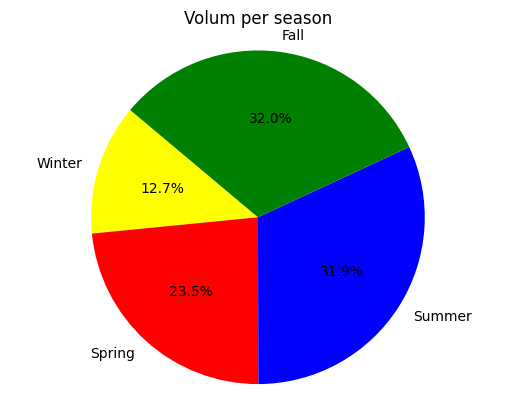

In [1232]:
seasons = [0, 1, 2, 3]
volum = []

visualization_data = weather_traffic_data.dropna()

for season in seasons:
    data = visualization_data[visualization_data["Season"] == season]
    volum.append(data["Volum"].astype(int).sum())


labels = "Winter", "Spring", "Summer", "Fall"
colors = ["yellow", "red", "blue", "green"]
explode = (0, 0, 0, 0) 


plt.pie(volum, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis("equal")
plt.title("Volum per season")
plt.show()

We see from the pie chart that most people rides over Nygårdsbroen during the summer and least people rides over Nygårdsbroen during the winter, which is expected. 

#### **Weekdays and weekends**

I have chosen to divide the days into the different weekdays, where 0 represents monday, 1 represents tuesday and so on. Then I have shown in the "Weekends" column if it is Monday to Friday, represented with 0, and if it is Saturday and Sunday, represented with 1.

It is probably more people crossing Nygårdsbroen Monday to Friday, than Saturday and Sunday, because it is work- and school days. 

In [1233]:
weather_traffic_data["Weekdays"] = weather_traffic_data["Datetime"].dt.day_of_week
weather_traffic_data["Weekends"] = np.where((weather_traffic_data["Weekdays"] > 5), 1,0)
weather_traffic_data

,Datetime,Globalstraling,Solskinstid,Lufttemperatur,Vindstyrke,Dekningsgrad (%),Volum,Season,Weekdays,Weekends
0,2015-07-16 15:00:00,504.400000,43.4,13.900000,4.083333,0,NaN,2,3,0
1,2015-07-16 16:00:00,432.833333,48.7,13.733333,4.333333,100,107.0,2,3,0
2,2015-07-16 17:00:00,378.400000,60.0,13.866667,3.933333,100,84.0,2,3,0
3,2015-07-16 18:00:00,212.583333,60.0,13.216667,4.233333,100,57.0,2,3,0
4,2015-07-16 19:00:00,79.750000,60.0,12.683333,2.950000,100,49.0,2,3,0
...,...,...,...,...,...,...,...,...,...,...
60150,2022-05-28 22:00:00,-0.483333,0.0,7.450000,4.983333,NaN,NaN,1,5,0
60151,2022-05-28 23:00:00,-0.766667,0.0,7.133333,5.050000,NaN,NaN,1,5,0
60152,2022-05-29 00:00:00,-0.816667,0.0,7.016667,4.566667,NaN,NaN,1,6,1
60153,2022-05-29 01:00:00,-0.866667,0.0,6.816667,3.533333,NaN,NaN,1,6,1


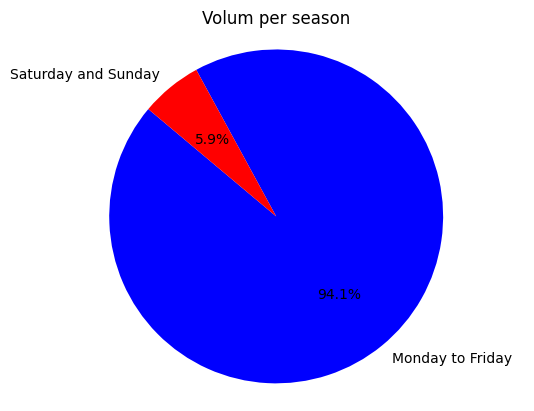

In [1234]:
days = [0, 1]
volum = []

visualization_data = weather_traffic_data.dropna()

for day in days:
    data = visualization_data[visualization_data["Weekends"] == day]
    volum.append(data["Volum"].astype(int).sum())

labels = "Monday to Friday", "Saturday and Sunday"
colors = ["blue", "red"]
explode = (0, 0) 

plt.pie(volum, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis('equal')
plt.title("Volum per season")
plt.show()

### **Data clean**

Then I dropped 2022 from the data file and saved it as an own parameter called weather_traffic_2022, since that is the year we are going to predict. 

In [1235]:
weather_traffic_2022 = weather_traffic_data[weather_traffic_data["Datetime"].dt.year == 2022]
weather_traffic_data.drop(weather_traffic_data[(weather_traffic_data["Datetime"] >= "2022-01-01, 00:00")].index,inplace=True)

After saving the data for 2022 in a new file, I checked how the column "Dekningsgrad (%)" looked, and by running the command below, we see that the column only consists of NaN. Because of that, I removed that column from the data file. 

In [1236]:
weather_traffic_2022["Dekningsgrad (%)"].unique()

array([nan], dtype=object)

In [1237]:
weather_traffic_2022.drop("Dekningsgrad (%)", axis=1, inplace=True)

C:\Users\julie\AppData\Local\Temp\ipykernel_61620\4241935611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_traffic_2022.drop("Dekningsgrad (%)", axis=1, inplace=True)


After dropping "Dekningsgrad (%)", I saved the weather and traffic data for 2022 as an own csv file.

In [1238]:
weather_traffic_2022.to_csv("weather_traffic_2022.csv", index=False)

After cleaning up the data from 2022, I got back to the rest of the data, and started to clean that up. First I had a look on the data, to be sure that 2022 was gone. 

In [1239]:
weather_traffic_data

,Datetime,Globalstraling,Solskinstid,Lufttemperatur,Vindstyrke,Dekningsgrad (%),Volum,Season,Weekdays,Weekends
0,2015-07-16 15:00:00,504.400000,43.4,13.900000,4.083333,0,NaN,2,3,0
1,2015-07-16 16:00:00,432.833333,48.7,13.733333,4.333333,100,107.0,2,3,0
2,2015-07-16 17:00:00,378.400000,60.0,13.866667,3.933333,100,84.0,2,3,0
3,2015-07-16 18:00:00,212.583333,60.0,13.216667,4.233333,100,57.0,2,3,0
4,2015-07-16 19:00:00,79.750000,60.0,12.683333,2.950000,100,49.0,2,3,0
...,...,...,...,...,...,...,...,...,...,...
56596,2021-12-31 19:00:00,-0.266667,0.0,5.616667,2.650000,100,4.0,0,4,0
56597,2021-12-31 20:00:00,-0.550000,0.0,4.700000,1.916667,100,2.0,0,4,0
56598,2021-12-31 21:00:00,-1.400000,0.0,4.233333,1.733333,100,5.0,0,4,0
56599,2021-12-31 22:00:00,-1.783333,0.0,3.716667,0.600000,100,2.0,0,4,0


Then I checked "Dekningsgrad (%)" for the rest of the data and removed the rows where it was 0 and NaN.

In [1240]:
weather_traffic_data["Dekningsgrad (%)"] = weather_traffic_data["Dekningsgrad (%)"].astype("float")
weather_traffic_data.drop(weather_traffic_data[weather_traffic_data["Dekningsgrad (%)"] == 0 ].index, inplace=True)
weather_traffic_data.drop(weather_traffic_data[weather_traffic_data["Dekningsgrad (%)"].isnull()].index,inplace=True)

Since the data from 2022 does not contain any values for "Dekningsgrad (%)", I just drop the whole column.

In [1241]:
weather_traffic_data.drop("Dekningsgrad (%)", axis=1, inplace=True)

In [1242]:
weather_traffic_data

,Datetime,Globalstraling,Solskinstid,Lufttemperatur,Vindstyrke,Volum,Season,Weekdays,Weekends
1,2015-07-16 16:00:00,432.833333,48.7,13.733333,4.333333,107.0,2,3,0
2,2015-07-16 17:00:00,378.400000,60.0,13.866667,3.933333,84.0,2,3,0
3,2015-07-16 18:00:00,212.583333,60.0,13.216667,4.233333,57.0,2,3,0
4,2015-07-16 19:00:00,79.750000,60.0,12.683333,2.950000,49.0,2,3,0
5,2015-07-16 20:00:00,10.633333,36.0,12.066667,2.483333,45.0,2,3,0
...,...,...,...,...,...,...,...,...,...
56595,2021-12-31 18:00:00,-0.100000,0.0,6.483333,0.466667,5.0,0,4,0
56596,2021-12-31 19:00:00,-0.266667,0.0,5.616667,2.650000,4.0,0,4,0
56597,2021-12-31 20:00:00,-0.550000,0.0,4.700000,1.916667,2.0,0,4,0
56598,2021-12-31 21:00:00,-1.400000,0.0,4.233333,1.733333,5.0,0,4,0


Then I checked the data for missing values.

In [1243]:
print(weather_traffic_data.isnull().sum())

Datetime            0
Globalstraling     60
Solskinstid         0
Lufttemperatur    281
Vindstyrke        280
Volum               0
Season              0
Weekdays            0
Weekends            0
dtype: int64


Sets the values for "Lufttemperatur", "Vindstyrke" and "Globalstraling" to the mean value, to avoid having missing values.

In [1244]:
weather_traffic_data["Lufttemperatur"].fillna((weather_traffic_data["Lufttemperatur"].mean()), inplace=True)
weather_traffic_data["Vindstyrke"].fillna((weather_traffic_data["Vindstyrke"].mean()), inplace=True)
weather_traffic_data["Globalstraling"].fillna((weather_traffic_data["Globalstraling"].mean()), inplace=True)

Ultimately, I saved the clean data to a file. 

In [1245]:
weather_traffic_data.to_csv("clean_data.csv", index=False)